In [16]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [17]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH = r"C:\Unipi-CS\Πτυχιακή\source_code\brisc2025_cnn_final.pth"
DATA_DIR = r"C:\Unipi-CS\Πτυχιακή\datasets\raw\classification_task\test"

IMG_SIZE = 224
BATCH_SIZE = 32
CLASS_NAMES = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
NUM_CLASSES = 4

In [18]:
test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.1735, 0.1735, 0.1735],
                         std=[0.1718, 0.1718, 0.1718])
])

In [21]:
test_dataset = datasets.ImageFolder(root=DATA_DIR, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                         shuffle=False, num_workers=4, pin_memory=True)

print(f"Loaded test dataset with {len(test_dataset)} images.")


def get_resnet18(num_classes=4, pretrained=False):
    model = models.resnet18(pretrained=pretrained)
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)
    return model

checkpoint = torch.load(MODEL_PATH, map_location=DEVICE)

model = get_resnet18(NUM_CLASSES)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint = torch.load(r"C:\Unipi-CS\Πτυχιακή\source_code\brisc2025_cnn_final.pth", map_location=device)

# Και μετά φορτώνουμε στο μοντέλο ΜΟΝΟ το κομμάτι που έχει τα βάρη (model_state_dict)
model.load_state_dict(checkpoint)
model = model.to(DEVICE)
model.eval()


Loaded test dataset with 1000 images.


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       254
  meningioma       0.97      0.98      0.97       306
    no_tumor       0.98      1.00      0.99       140
   pituitary       0.99      0.99      0.99       300

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000


Confusion Matrix:
 [[247   6   0   1]
 [  3 299   3   1]
 [  0   0 140   0]
 [  0   3   0 297]]


c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0049476027..2.7456288].


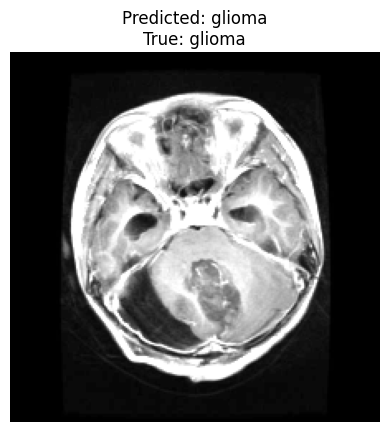

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0049476027..2.505952].


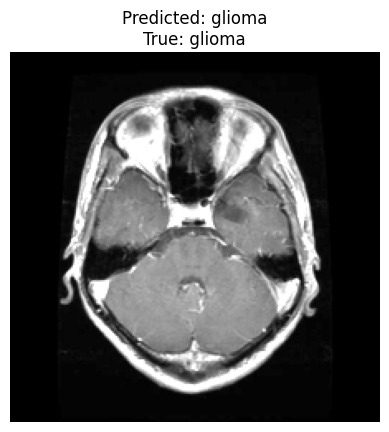

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0049476027..2.186383].


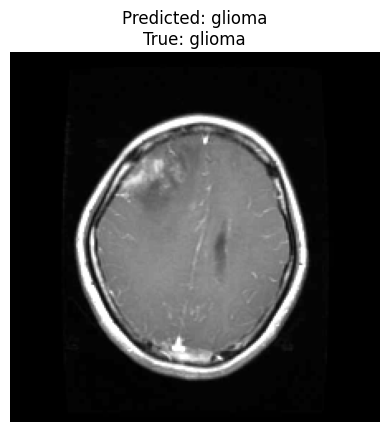

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0049476027..2.5516047].


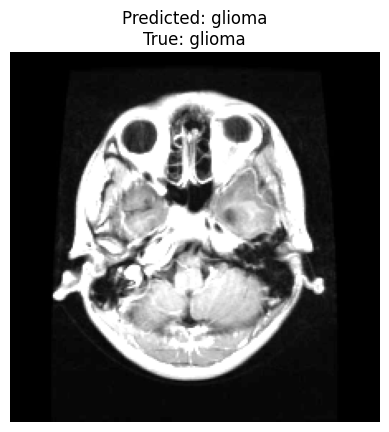

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0049476027..2.1521435].


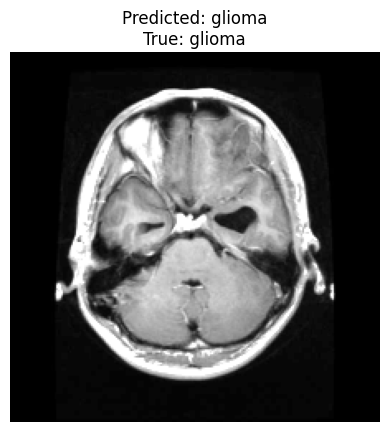

In [22]:

all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=CLASS_NAMES))

cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:\n", cm)

def imshow(img, title):
    img = img.cpu() / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images.to(DEVICE))
_, preds = torch.max(outputs, 1)

for i in range(min(5, len(images))):
    imshow(images[i], f"Predicted: {CLASS_NAMES[preds[i]]}\nTrue: {CLASS_NAMES[labels[i]]}")

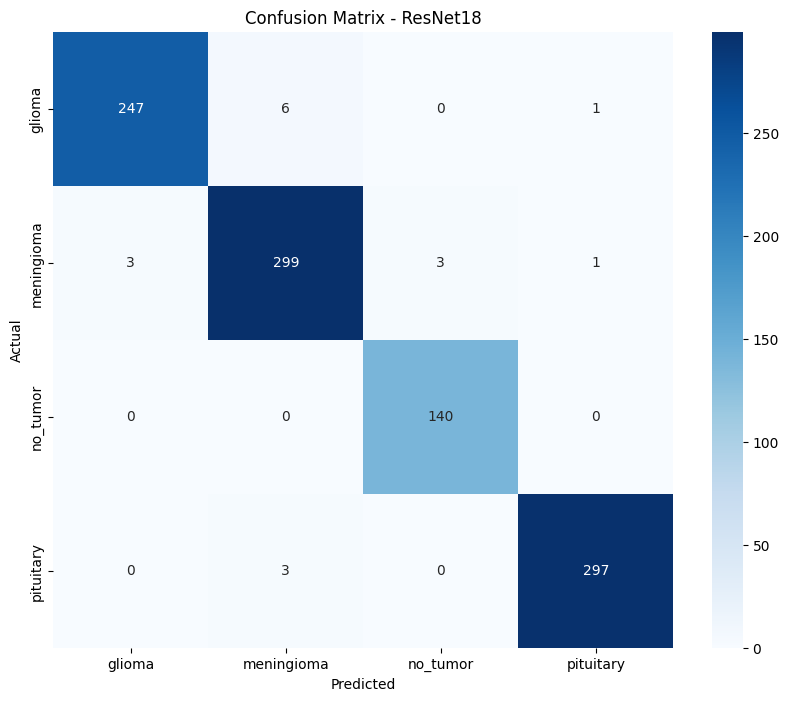

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


cm = [[247, 6, 0, 1],
      [3, 299, 3, 1],
      [0, 0, 140, 0],
      [0, 3, 0, 297]]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ResNet18')
plt.show()